Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')


<AxesSubplot:>

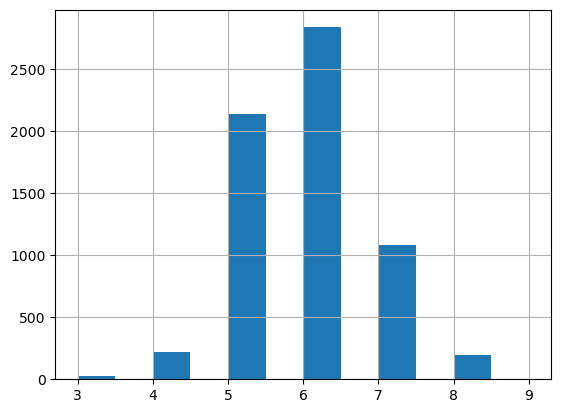

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./data/wines-quality.csv')
print(df.columns)
df.head()
df.quality.hist(bins=12)

In [2]:
from sklearn.model_selection import train_test_split
X = df.drop("quality", axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.5)
X_train.shape, X_test.shape

((3248, 12), (3249, 12))

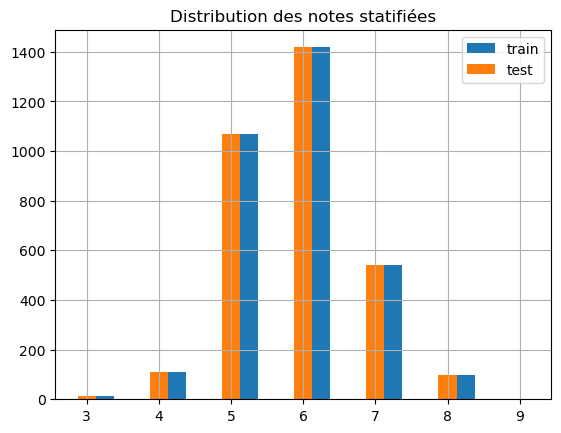

In [3]:
ax=y_train.hist(bins=24,label="train",align="right")
y_test.hist(bins=24,label="test",ax=ax ,align="left")
ax.set_title("Distribution des notes statifiées")
ax.legend()

In [4]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [5]:
df.color.unique()

array(['red', 'white'], dtype=object)

In [26]:
df['color'] = df.color.apply(lambda x: 0 if x=='red' else 0)


In [27]:
df.color.unique()

array([0], dtype=int64)

In [28]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                     int64
dtype: object

In [29]:

X = df.drop("quality", axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3)
X_train.shape, X_test.shape

((4547, 12), (1950, 12))

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [31]:
lr.fit(X_train, y_train)

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:

lr.predict(X_test[:5])

array([5, 6, 6, 6, 6], dtype=int64)

In [37]:
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        65
           5       0.51      0.41      0.45       642
           6       0.46      0.78      0.58       851
           7       0.00      0.00      0.00       324
           8       0.00      0.00      0.00        58
           9       0.00      0.00      0.00         1

    accuracy                           0.47      1950
   macro avg       0.14      0.17      0.15      1950
weighted avg       0.37      0.47      0.40      1950



C:\Users\HOME\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


dimension de X : (100, 2)
dimension de Y : (100, 1)


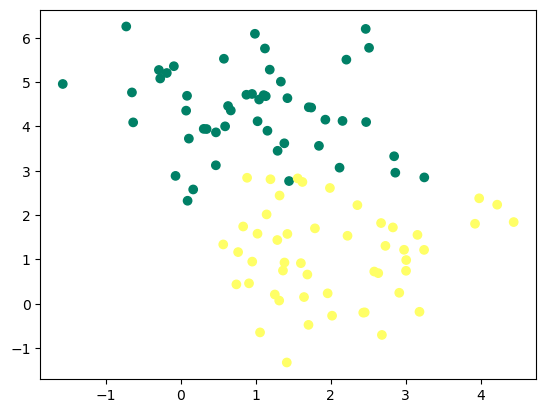

In [38]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm

X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
#new=np.array([-1,6])

#print(X)
y= y.reshape((y.shape[0],1))      #(2,1)
print('dimension de X :',X.shape) 
print('dimension de Y :',y.shape)

plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
#plt.scatter(new[0],new[1],c='r')
plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [40]:
lr.predict(X)


array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [41]:
from sklearn.metrics import classification_report

y_pred = lr.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        50
           1       0.96      0.92      0.94        50

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

